# Intervalos de Bola

####Pablo Enrique Yanes Thomas y Antonio Sebastián Rosado González

## Introducción

Durante el curso se trabajó con bastante detalle la aritmética de intervalos. Se definieron los intervalos $[a,b] \subseteq \mathbb{R^*}$ en una dimensión como los conjuntos:

$$[a,b] := \{x \in [a,b] \Leftrightarrow a\leq x \leq b\}$$

Esta deficinición de intervalo tiene la ventaja de que es fácil generalizar las operaciones aritméticas de números a intervalos. Por ejemplo, la suma de dos intervalos se define como:

$$[a,b]+[c,d]=[a+c,b+d]$$

Claramente la operación es cerrada. En el caso de funciones monótonas, la generalización a intervalos es igualmente directa. Para una función $F(x)$:

$$F([a,b]) = [F(a),F(b)]$$

Para funciones periódicas la generalización es un poco más compleja. El interés en los intervalos dentro de los métodos numéricos radica en que en lugar de obtener un número de punto flotante que probablemente solo aproxime la respuesta correcta, los métodos de intervalos son capaces de generar un intervalo que contiene la respuesta correcta. Dadas las condiciones correctas esto se puede *garantizar*. Los extremos del intervalo entonces funcionan como cotas duras para la respuesta final. Sin embargo, esta no es la única forma posible de representar un intervalo. Mientras que esta representación se basa en especificar los dos extremos del conjunto, es posible representar un intervalo mediante un punto llamado centro y una distancia máxima, respecto a este centro, a la cual puede estar un punto y aún ser parte del conjunto. Estos conjuntos se conocen como intervalos de *bola*. 

## Representación de Intervalos de Bola

Se define un intervalo de bola como un conjunto $[x_0,r] \subseteq \mathbb{R^*}$ tal que:

$$[x_0,r] := \{x \in [x_0,r] \Leftrightarrow |x-x_0| \leq r\}$$

$x_0$ es el *centro* del intervalo y $r$ es su *radio*. Es muy sencillo pasar de una representación de intervalos a otra, simplemente utilizando que:

$$x_0=\frac{a+b}{2}$$

y

$$r=\frac{|b-a|}{2}$$

Esta representación es, básicamente, la definición estandard de una vecindad en matemáticas. La interpretación intuitiva de un intervalo de bola es un número más una delta, $x_0 + \Delta x_0$. Mientras que en una diemnsión no hay gran diferencia geométrica entre ambas representaciones, al generalizar a más dimensiones las representaciones dejan de ser equivalentes. Por ejemplo, en dos dimensiones los intervalos que se utilizaron durante el curso definen rectángulos en el plano mientras que los intervalos de bola definen discos. La constricción de asignar un solo radio automáticamente dicta que el conjunto presenta simetría esférica. La generalización de operaciones a intervalos de bola es algo distinta del caso anterior y se presentan algunos casos a continuación.

## Aritmética de Intervalos de Bola

La forma que deben tener las operaciones se puede deducir de la representación anterior de los intervalos, utilizando las ecuaciones que nos permiten pasar de una representación a otra. Si se invierten las ecuaciones, se obtiene:



1 **Suma**
$$[x_0,r]+[y_0,s]=[x_0+y_0,r+s]$$

2 **Resta**
$$[x_0,r]-[y_0,s]=[x_0-y_0,r+s]$$

3 **Multiplicación**
$$[x_0,r]\times[y_0,s]=[x_0\times y_0,|x|s+rs+r|y|]$$

4 **División**
$$\frac{[x_0,r]}{[y_0,s]}=[\frac{x_0}{y_0},|x|s+rs+\frac{r}{|y|}]$$

Nota: La división no está definida si $0\in [y_0,s]$. En está representación no es factible definir la *división extendida* como se hizo para el caso de intervalos estandard. Esto se debe a la presencia de infinitos. Mientras que en el caso previo era posible tener intervalos de tipo:

$$[a,\infty)$$

$$(-\infty,b]$$

En esta representación es imposible determinar un centro (no existe tal cosa como el punto medio entre un real y el infinito) y de cualquier forma el radio sería infinito lo cual convertiría al intervalo en la recta real. Esta es una limitación inherente de la representación de intervalos de bolas. Se muestran ejemplos a continuación utlizando el modulo de intervalos de bolas.

In [1]:
using Bolas, ImageView, Images, Intervals, PyPlot

    ^(Derive,Real) at /home/pablo1/Documents/Tareas/ProyectoFinalMNA/Derivatives.jl:93
is ambiguous with: 
    ^(Any,Integer) at intfuncs.jl:86.
To fix, define 
    ^(Derive,Integer)
before the new definition.
    promote_type(Type{T<:Number},Type{Interval}) at /home/pablo1/Documents/Tareas/ProyectoFinalMNA/Intervals.jl:467
is ambiguous with: 
    promote_type(Type{None},Type{T}) at promotion.jl:103.
To fix, define 
    promote_type(Type{None},Type{Interval})
before the new definition.
    promote_type(Type{T<:Number},Type{Interval}) at /home/pablo1/Documents/Tareas/ProyectoFinalMNA/Intervals.jl:467
is ambiguous with: 
    promote_type(Type{T},Type{T}) at promotion.jl:101.
To fix, define 
    promote_type(Type{_<:Number},Type{_<:Number})
before the new definition.
INFO: Loading help data...


In [34]:
A=Bola(5,5) #Se definen como Bola(centro,radio)
B=Bola(5,2)

Bola(5,2)

In [12]:
contiene(B^5,6.7^5)


true

In [7]:
Bola(1,-1) #El constructor obliga a que el radio sea positivo

Bola(1,1)

In [8]:
A+B #Suma

Bola(7,3)

In [9]:
A-B #Resta

Bola(-3,3)

In [10]:
A*B #Multiplicación, empiza la sobre estimación

Bola(10,11.0)

In [11]:
A/B #División, regresa error si B contiene el 0

Bola(0.4,11.0)

Toas las operaciones contienen redondeo dirigido hacia arriba al calcular el radio, ya que es necesario lograr una cobertura total del rango posible de respuestas.

En el modulo se define una serie de funciones auxiliares que permiten ver si un número se encuentra contenido en una bola en particular, revisar la intersección de dos bolas, etc:

In [16]:
contiene(A+B,A.centro+A.radio+B.centro+B.radio)

true

La distancia entre dos bolas es la distancia entre sus centros

In [15]:
distancia(A+.125,A)

0.125

También se definió la exponenciación:

In [27]:
A^2

Bola(4,6)

In [28]:
contiene(A^2,(A.centro+A.radio)^2)

true

Sin embargo aquí puede observarse uno de los problemas claves de utilizar la representación de intervalos de bolas: la sobre-estimación. Es muy común que la operación o función no sea simétrica en torno al centro del intervalo. Por ejemplo, dado el caso de la exponencial:

$$|e^{x}-e^{x-\delta x}|\leq|e^{x}-e^{x+\delta x}|$$

Si se toma el intervalo solución como:

$$F([x_0,r])=[F(x_0),r']$$

El problema radica en encontrar el radio más pequeño que cubra todo el conjunto de puntos que se pueden obtener al aplicar la función a un punto en la bola inicial. Si en efecto se toma el centro de esta forma, se obtiene una sobre estimación en una de las dos direcciones. Al aplicar varias funciones el radio de la bola crece de forma acelerada:

In [17]:
exp(A).radio/A.radio

12.696480824257018

In [33]:
C=Interval(0,10)

Interval(0.0,10.0)

In [35]:
2*exp(A).radio/(exp(C).b-exp(C).a)

1.9866142981514303

La bola abarca muchos más números que los intervalos regulares. Esto podría solucionarse obteniendo los posibles extremos de la bola y calculando un nuevo centro, pero esto eliminaría la interpretación de vecindad y en ese caso sería mejor simplemente no utilizar intervalos de bolas. Explicitamente, las funciones elementales implementadas en nuestro modulo para el tipo compuesto bola son: la exponencial, el logaritmo, las trigonométricas junto con sus inversas y sus variantes hiperbólicas. Siguiendo la filosofia de los intervalos de bola antes mencionada, todas estas funciones fueron definidas a modo de que la aplicación de las mismas, entregara una bola nueva cuyo centro es directamente la función evaluada en el punto medio de la bola original. Para definir el radio de la bola resultante, se procedió de la siguiente manera:

Primero hacemos la siguiente observación, siendo $[a,b]$ un intervalo estándar y F una función monótona en dicho intervalo: 

\begin{equation}
F([a,b])=F([x_0-r,x_0+r])=[F(x_0-r),F(x_0+r)] 
\end{equation}

(ó $=[F(x_0+r),F(x_0-r)]$ si es decreciente) con $x_0$ y $r$ como fueron definidos anteriormente. 


Es obvio que $F(m) \in [F(m-r),F(m+r)]$, pero ciertamente $F(m)$ no corresponde al punto medio de esta extensión natural del intervalo. Por esto, para definir el radio de la bola imagen de F, lo hacemos de la siguiente manera:

\begin{equation}
r'=max\{|F(m+r)-F(m)|,|F(m)-F(m-r)|\} 
\end{equation}


Esto se implemento en el código de manera general, pero a modo de ejemplo se realizaron los cálculos de manera explicita solo para algunas funciones y se implementaron los radios con las formulas encontradas, como se muestra a continuación:

La función seno es monótona creciente en el intervalo $[-\frac{\pi}{2},\frac{\pi}{2}]$:

\begin{equation}
r'=sin(m)-sin(m-r)=sin(m)(1-cos(r))+sin(r)cos(m) \hspace{.5cm}\forall \hspace{.1cm}m \in [0,\frac{\pi}{2}]
\end{equation}

\begin{equation}
r'=sin(m+r)-sin(m)=sin(m)(cos(r)-1)+sin(r)cos(m) \hspace{.5cm}\forall \hspace{.1cm}m \in [-\frac{\pi}{2},0]
\end{equation}

La función coseno es monótona decreciente en el intervalo $[0,\pi]$:

\begin{equation}
r'=cos(m)-cos(m+r)=cos(m)(1-cos(r))+sin(r)sin(m) \hspace{.5cm}\forall \hspace{.1cm}m \in [0,\frac{\pi}{2}]
\end{equation}

\begin{equation}
r'=cos(m-r)-cos(m)=cos(m)(cos(r)-1)+sin(r)sin(m) \hspace{.5cm}\forall \hspace{.1cm}m \in [\frac{\pi}{2},\pi]
\end{equation}

La función tangente es monótona creciente en el intervalo $[-\frac{\pi}{2},\frac{\pi}{2}]$:

\begin{equation}
r'=tan(m+r)-tan(m)=tan(r)(\frac{1+tan(m)^2}{1-tan(m)tan(r)})\hspace{.5cm} \forall \hspace{.1cm}m \in [0,\frac{\pi}{2}] 
\end{equation}

\begin{equation}
r'=tan(m)-tan(m-r)=tan(r)(\frac{1+tan(m)^2}{1+tan(m)tan(r)}) \hspace{.5cm}\forall \hspace{.1cm}m \in [-\frac{\pi}{2},0]
\end{equation}

La función cotangente es monótona decreciente en el intervalo $[0,\pi]$:

\begin{equation}
r'=cot(m-r)-cot(m)=(\frac{tan(r)}{tan(m)})(\frac{1+tan(m)^2}{tan(m)-tan(r)}) \hspace{.5cm}\forall \hspace{.1cm}m \in [0,\frac{\pi}{2}] 
\end{equation}
\begin{equation}
r'=cot(m)-cot(m+r)=(\frac{tan(r)}{tan(m)})(\frac{1+tan(m)^2}{tan(m)-tan(r)}) \hspace{.5cm} \forall \hspace{.1cm}m \in [\frac{\pi}{2},\pi]
\end{equation}

La función exponencial es monótona creciente en todos los reales:

\begin{equation}
r'=e^{m+r}-e^{m}=e^{m}(cosh(r)+senh(r)-1) \hspace{.5cm} \forall \hspace{.1cm}m
\end{equation}

La función logaritmo es monótona creciente en los reales positivos:

\begin{equation}
r'=log(m)-log(m-r)=log(\frac{m}{m-r})\hspace{.5cm} \forall \hspace{.1cm}m>r
\end{equation}

Cabe notar que en todas las operaciones aritmeticas anteriores, se implemento redondeo hacia arriba.

## Método de Newton

Una posible aplicación de los intervalos de bola es el Método de Newton. Idealmente, este método encontraría todas las raíces de una función dada por el usuario buscando dentro de un intervalo de bola dado como condición inicial. Para poder aplicar el método, el cual vimos en clase en el notebook 9, requerimos varias funciones auxiliares, todas las cuales se encuentran en la libreria de intervalos de bola:

* **Bisección** de bolas: una función que toma un intervalo de bola y lo divide en dos de manera simétrica. Esto se utiliza para aplicar el método de Newton en todas las regiones de interés.



* **Quitar intervalos no útiles**: como los intervalos de bola contienen sobre-estimación, si al aplicar una función a uno de ellos la bola resultante no contiene el cero, podemos estar seguros de que no es necesario buscar una raíz en esa bola.



* **Quitar intervalos donde la derivada se anula**: El método de Newton requiere dividir por la derivada de la función. En los intervalos de bola no podemos definir una división extendida útil, por lo que es necesario deshacerse de estos sitios problemáticos.



* **Quitar raíces repetidas**: debido a la bisección, es posible que el método encuentre la misma raíz más de una vez. Antes de regresar una respuesta el método elimina raíces que se encuentran más cerca la una de la otra que una tolerancia dada.




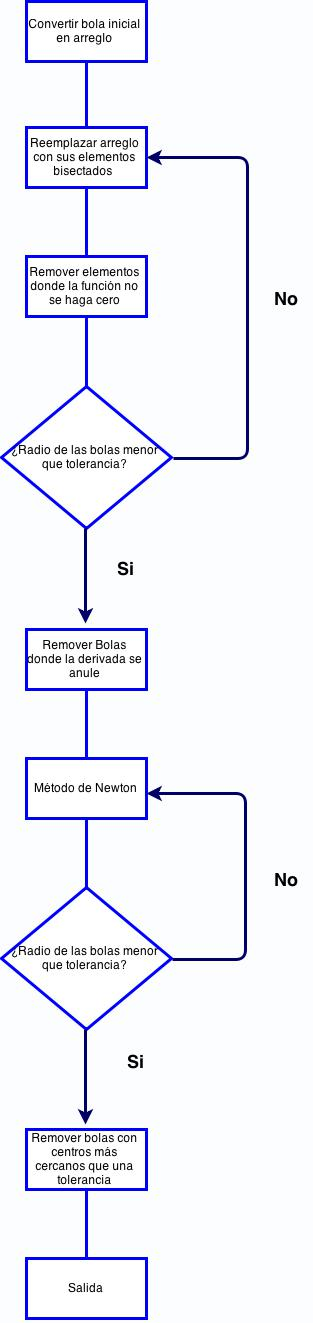

In [24]:
img = imread("EsquemaNewton.jpg")

El método que se implementó es híbrido. Empieza con bisección para poder encontrar todas las raíces contenidas en la condición inicial, y utiliza Newton ya que este refina el centro de la bola mucho más rápido que la bisección. Dividir la condición inicial en varias regiones también permite evitar los ceros de la derivada si estos no se encuentran demasiado cerca de los ceros de la función.

###Ventajas:

* El método puede encontrar todas las raíces en una región dada, no solo una como el método tradicional de Newton.

* Las raíces que se encuentran son intervalos de bola, así que no solo están acotadas, también se expresan de una forma intuitiva.

* El método es capaz de dar cotas bastante pequeñas.

###Desventajas

* La sobre-estimación puede causar que el método no logre mejorar el resultado de la bisección, en casos como los polinomios de Wilkinson (depende fuertemente del grado del polinomio)

* Si la derivada y la función comparten una raíz, esta no está al alcance del método. 

## Ejemplos

A continuación vemos algunos ejemplos de el método en acción con distintas funciones.

####$$F_1(x)=(x-1)(x-2)(x-3)(x-4)(x-5)$$

Este es el polinomio de Wilkinson de grado 5, el cual evidentemente tiene raíces en 1,2,3,4 y 5. Si se grafica la función obtenemos:

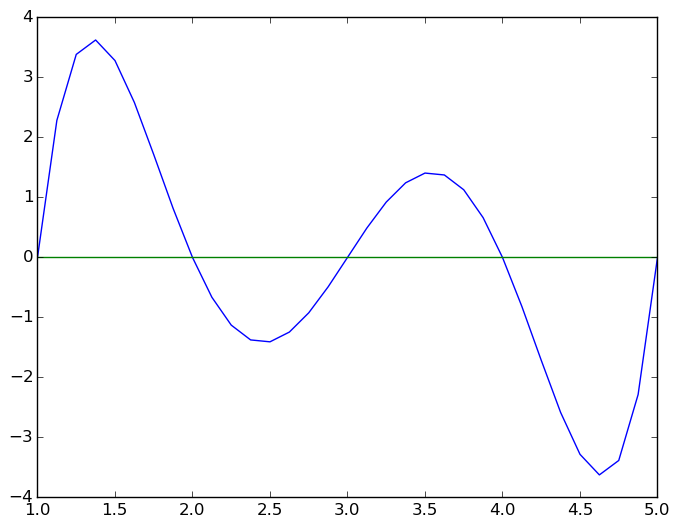

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87f6eb0490>
 PyObject <matplotlib.lines.Line2D object at 0x7f87f6eb0710>

In [3]:
F1(x)=(x-1)*(x-2)*(x-3)*(x-4)*(x-5)

X=[i*.125 for i in 8:40]
Z=zeros(length(X))

Y1=[F1(x) for x in X]

p1=plot(X,Y1,X,Z)

El polinomio se dispara fuera de la región que contiene sus raíces. Aplicando el método de Newton se obtiene:

In [13]:
metodo_newton_bola(F1,Bola(.125,7),1e-6)

Posible raíz en 0.9999935610793005 ± 4.872573238672087e-16
Posible raíz en 2.000000001396981 ± 1.7500024230248514e-16
Posible raíz en 2.999999999809265 ± 1.8000001945497345e-16
Posible raíz en 4.0 ± 2.0000000000000453e-16
Posible raíz en 5.000000000001526 ± 1.960000186795498e-16


####$$F_2(x)=(x-3)(x+4)(e^x-1)$$

En este caso se tiene una mezcla de raíces, hay raíces negativas, positivas, etc. Si graficamos la función tenemos:

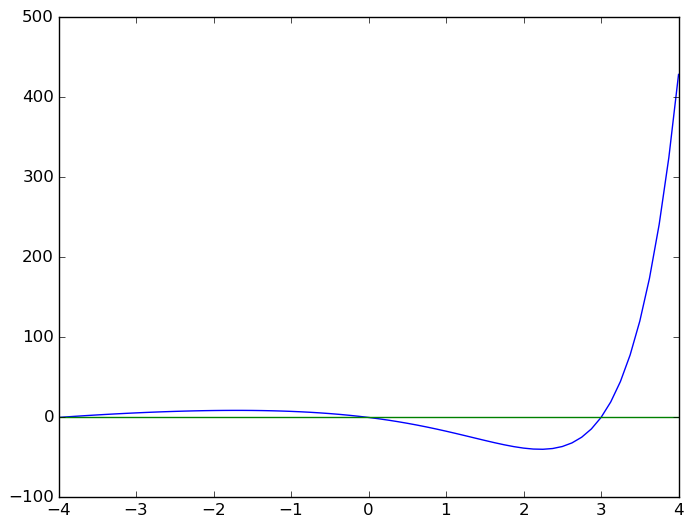

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87cf6c6d50>
 PyObject <matplotlib.lines.Line2D object at 0x7f87cf6c6fd0>

In [30]:
F2(x)=(x-3)*(x+4)*(exp(x)-1)

X=[-4+i*.125 for i in 0:64]
Z=zeros(length(X))

Y2=[F2(x) for x in X]

p2=plot(X,Y2,X,Z)

In [35]:
metodo_newton_bola(F2,Bola(-1,4),1e-6)

Posible raíz en -4.000000000674032 ± 2.1630506587852344e-16
Posible raíz en -6.513670891471067e-11 ± 2.2111525824235837e-16
Posible raíz en 2.99999999748006 ± 2.663483546729693e-16


####$$F_3(X)=\frac{1}{8}(63x^5-70x^3+15x)$$

Este es el polinomio de Legendre de orden 5.

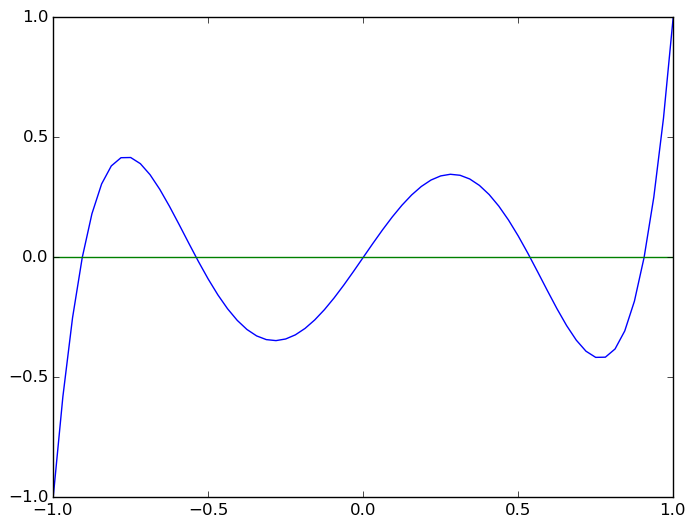

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f87cf562c10>
 PyObject <matplotlib.lines.Line2D object at 0x7f87cf562e90>

In [37]:
F3(x)=(1/8)*(63x^5-70x^3+15x)

X=[-1+i*.03125 for i in 0:64]
Z=zeros(length(X))

Y3=[F3(x) for x in X]

p3=plot(X,Y3,X,Z)

In [45]:
metodo_newton_bola(F3,Bola(0,1.1),1e-3)

Posible raíz en -0.906179845938664 ± 9.332546522480253e-16
Posible raíz en -0.5384693101056831 ± 6.661338147750939e-16
Posible raíz en -9.999992240530808e-17 ± 1.0000007759469199e-16
Posible raíz en 0.5384693101056831 ± 6.661338147750939e-16
Posible raíz en 0.906179845938664 ± 9.992007221626409e-16
